In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [45]:
with open("dm_w_grp_n_grp_t_snr_nn_var_widths.dat") as f:
    data = np.array([[float(field) for field in line.strip().split(' ')] for line in f])

with open("dm_w_grp_n_grp_t_snr_nn_var_widths_discrete.dat") as f:
    data_disc = np.array([[int(field) for field in line.strip().split(' ')] for line in f])

In [84]:
X = data[:,:-1]
Y = data[:,-1]
X_disc = data_disc[:,:-1]
Y_disc = data_disc[:,-1]

First let's see the results of feature selection on these algorithms 

In [3]:
!../src/MICalc++/micalc dm_w_grp_n_grp_t_snr_nn_var_widths_discrete.dat 

--MI--
4 0.0126401
0 0.00904933
1 0.00491508
12 0.000314758
13 0.000297448
5 0.000289115
8 0.000250348
11 0.00024757
9 0.000246665
10 0.000225018
6 0.000221188
7 0.000214014
14 0.000206102
2 3.3381e-05
3 1.80954e-05
--JMI--
4 0.0126401
0 0.0166097
1 0.0285325
8 0.0274666
2 0.0279905
6 0.0282941
9 0.0287003
12 0.0288765
7 0.0292527
5 0.0296178
13 0.0299896
14 0.0301642
11 0.0304303
10 0.0305331
3 0.0295018
--HD--
1 0.9618
4 0.899261
0 0.882574
5 0.701875
2 0.695558
6 0.616897
3 0.592351
7 0.581696
12 0.573
13 0.572826
8 0.571224
9 0.567209
11 0.566789
10 0.566302
14 0.561349


Visualise these with histograms of all the features in order 

index 15 is out of bounds for axis 1 with size 15


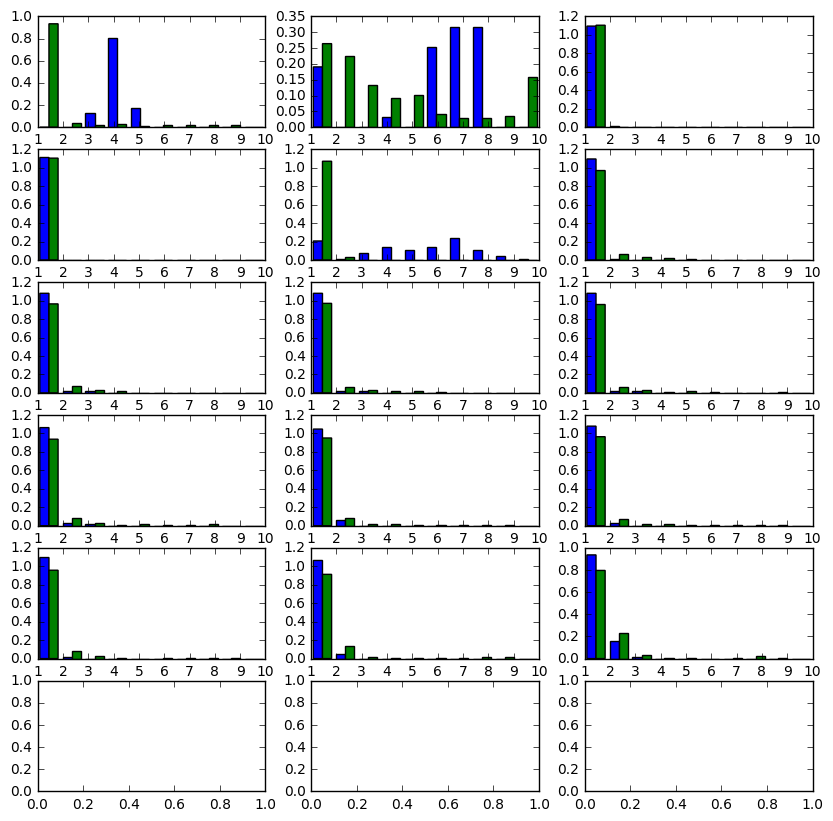

In [98]:
import itertools as itools

plt.rcParams["figure.figsize"] = 10,10
f, subplts = plt.subplots(6,3)

_,num_feats = X.shape

for i, ax in itools.izip(itools.count(0), itools.chain.from_iterable(subplts)):
    try:
        
        ax.hist([X_disc[:,i][Y == 1],X_disc[:,i][Y == 0]], normed = True)        
    except Exception as e:
        print e
        break

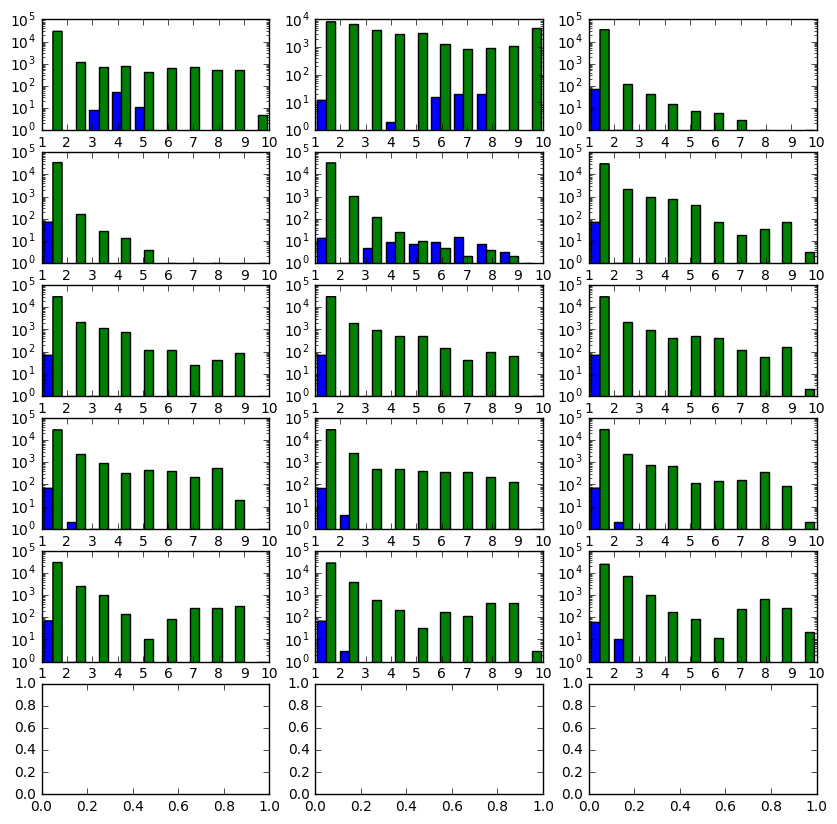

In [49]:

plt.rcParams["figure.figsize"] = 10,10
f, subplts = plt.subplots(6,3)

_,num_feats = X.shape

for i, ax in itools.izip(itools.count(0), itools.chain.from_iterable(subplts)):
    try:
        ax.hist([X_disc[:,i][Y == 1],X_disc[:,i][Y==0]] )
        ax.set_yscale('log')
    except Exception as e:
        break

This seems to explain the above fairly well: features 2 and 3 (the group number and time of group) do very badly because their intrinsic entropy is very low: nearly all observations fall in the same bin. This is interesting as these features currently feature prominently on the frb info plots that are produced by current software 

All the width features have a similar distribution.

Some of these don't seem to make a huge amount of sense though...